# **Final Project :** 
**Title :** Iris Prediction using Decision Tree Algorithm
 
**Done By :** Sondos Hosny Deraz

**Abstract :** 

This project analyze dataset taken from ( https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view ), by applying some of Data Analysis data visualization, and machine learning.

### **1. Importing all the liberaries and packages needed.**

In [1]:
# For data analysis :

import numpy as np
import pandas as pd

# For Data visualization : 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

# For Machine Learning :

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics , tree


### **2. Reading Data :**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/GRIP Tasks/Iris/Iris.csv', encoding = 'unicode_escape')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df = df.drop(['Id'],axis=1)

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **3. Data Processing :**

In [8]:
def ShowDetails():
    global df
    for col in df.columns : 
        print(f'for feature {col}\n')
        print(f'Number of Nulls is \n {df[col].isna().sum()}\n')
        print(f'Number of Unique Values is \n {len(df[col].unique())}\n')
        print(f'Unique Values is \n {df[col].unique()}\n')
        print(f'Value Counts are \n {df[col].value_counts()}\n')
        print('\n\n\n==================================\n\n\n')

In [9]:
ShowDetails()

for feature SepalLengthCm

Number of Nulls is 
 0

Number of Unique Values is 
 35

Unique Values is 
 [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]

Value Counts are 
 5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64







for feature SepalWidthCm

Number of Nulls is 
 0

Number of Unique Values is 
 23

Unique Values is 
 [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]

Value Counts are 
 3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3   

---
### Comments :
- No nulls 
- Species values are equal, therefor data set is NOT biased
- Data types doesn't need conversions 

### **4. Data Visualizing :**

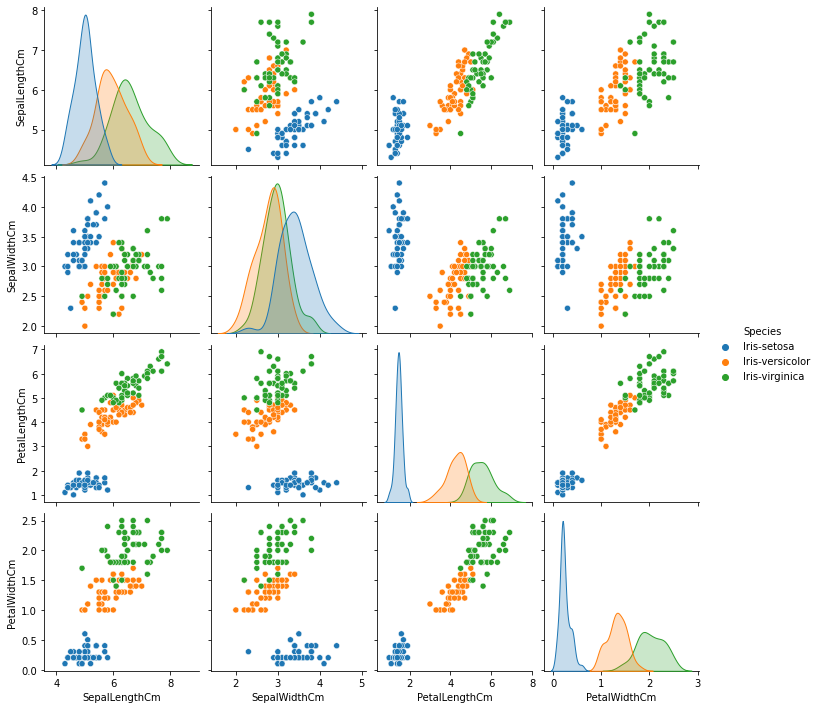

In [10]:
sns.pairplot(df,hue = 'Species')

In [11]:
def Pie(feature,limit=20) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(df[feature].value_counts()[:limit],labels = list(df[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None

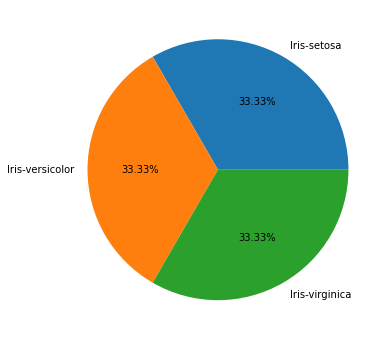

In [12]:
Pie('Species' , 4)

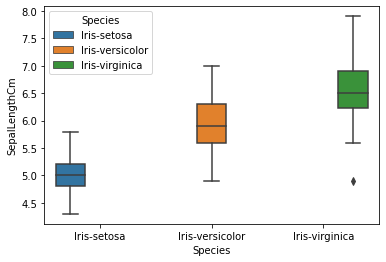

In [13]:
sns.boxplot(x ='Species',y='SepalLengthCm',data = df, orient = 'v',hue = 'Species')

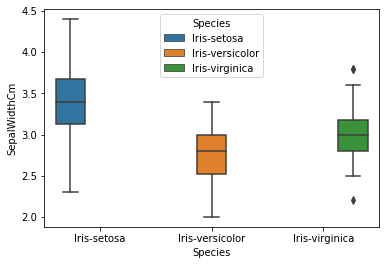

In [14]:
sns.boxplot(x ='Species',y='SepalWidthCm',data = df, orient = 'v',hue = 'Species')

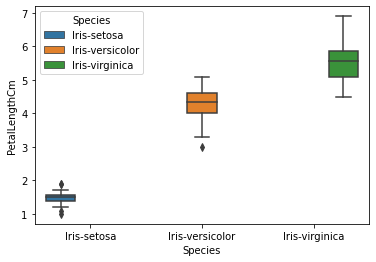

In [15]:
sns.boxplot(x ='Species',y='PetalLengthCm',data = df, orient = 'v',hue = 'Species')

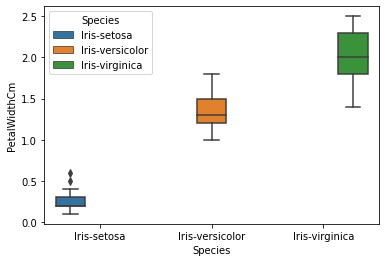

In [16]:
sns.boxplot(x ='Species',y='PetalWidthCm',data = df, orient = 'v',hue = 'Species')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

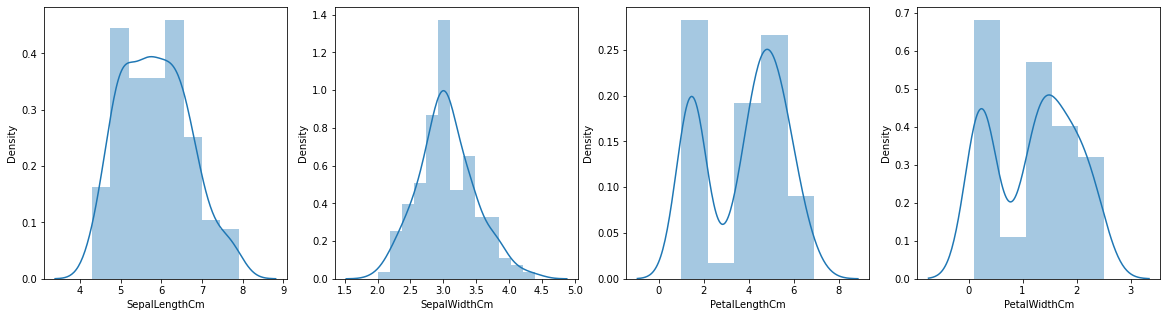

In [17]:
plt.figure(figsize=(20,5))
j = 1
for i in df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.distplot(df[i])
    j+=1

---
### Comments :
- Petal Length and Width columns are more segmented between species when compared to other two.
- Sepal length and Width have Normal distribution but Petal length and width doesn't. 


### **5. Machine Learning :**

In [18]:
x = df.drop('Species',axis=1)
y = df['Species']

In [19]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=100)

In [20]:
scaler= StandardScaler()  
x_train= scaler.fit_transform(x_train)    
x_test= scaler.transform(x_test)

In [21]:
params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 3, 5, 7, 9] }
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 9]},
             verbose=1)

In [22]:
best_classifier = gs.best_estimator_

In [23]:
y_pred = best_classifier.predict(x_test)


In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])

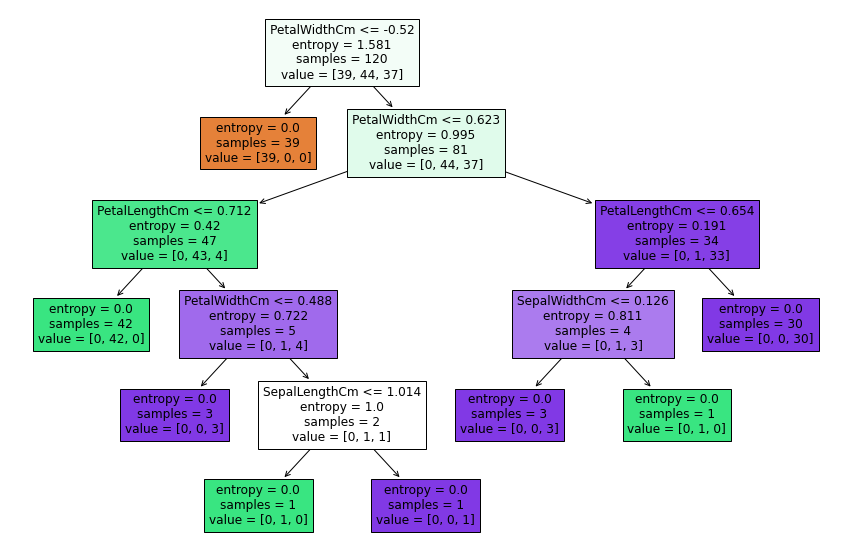

In [26]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(best_classifier, feature_names=df.columns, filled=True)
plt.show()